# MARKETING SPEND V/S SALES ANALYSIS

### Importing the Dataset

In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Advertising.zip', 'analysis.ipynb']


In [2]:
import zipfile
with zipfile.ZipFile("Advertising.zip","r") as zip_ref:
    zip_ref.extractall("Advertising")

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
df_advertising=pd.read_csv("Advertising/Advertising.csv")

In [5]:
df=df_advertising.copy()

### Understanding the Dataset

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## DATA PRE-PROCESSING

### Handling Missing Values

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Handling Duplicate Values

In [9]:
df.duplicated().sum()

np.int64(0)

## FEATURE ENGINEERING

## Relationship Between Advertising Channels and Sales

plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="TV",
    y="Sales"
)
plt.title("TV Advertising Spend v/s Sales")
plt.tight_layout()

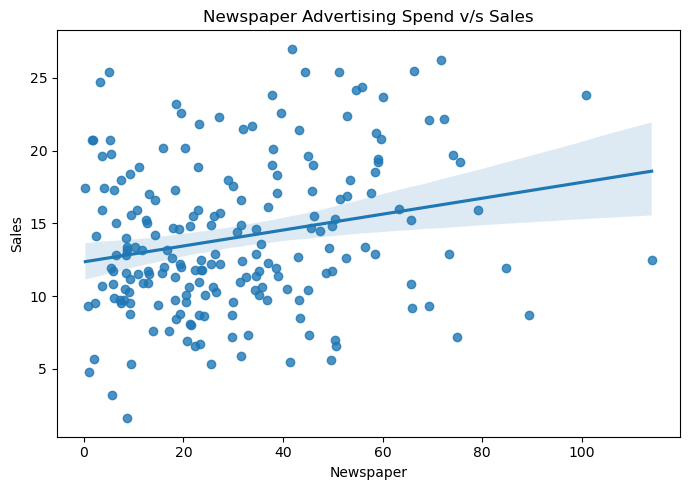

In [16]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Newspaper",
    y="Sales"
)
plt.title("Newspaper Advertising Spend v/s Sales")
plt.tight_layout()

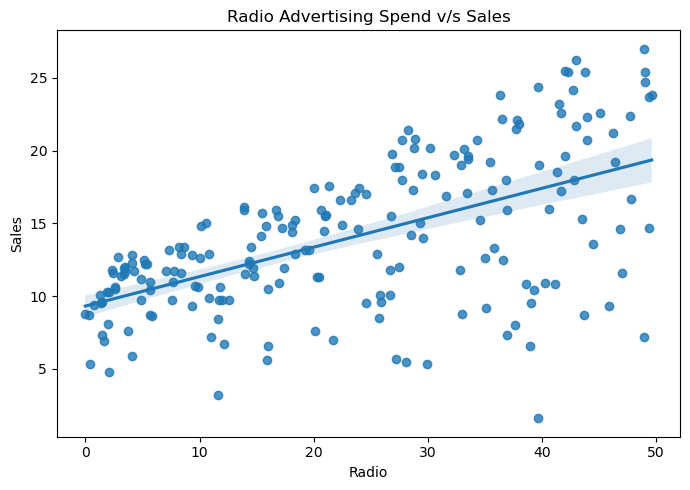

In [17]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Radio",
    y="Sales"
)
plt.title("Radio Advertising Spend v/s Sales")
plt.tight_layout()

Insights from EDA:

TV advertising spend shows the strongest positive relationship with Sales, as the data points are closely aligned along the regression line.

Radio advertising shows a moderate positive relationship with Sales, but with more scatter compared to TV.

Newspaper advertising shows weak relationship with Sales, as points are widely scattered and do not follow a strong linear pattern.

This suggests that TV ads contribute most significantly to Sales performance in this dataset.

## Correlation of Each Channel with Sales

In [20]:
df["TV"].corr(df["Sales"])

np.float64(0.7822244248616061)

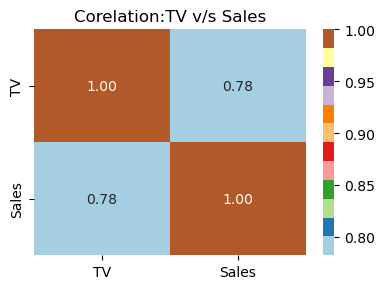

In [35]:
plt.figure(figsize=(4,3))
corr_tv_sales=df[["TV","Sales"]].corr()
sns.heatmap(
    corr_tv_sales,
    annot=True,
    cmap="Paired",
    fmt=".2f"
)
plt.title("Corelation:TV v/s Sales")
plt.tight_layout()

In [24]:
df["Radio"].corr(df["Sales"])

np.float64(0.5762225745710551)

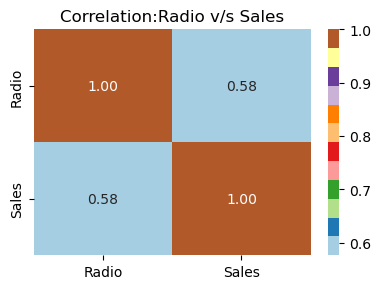

In [34]:
plt.figure(figsize=(4,3))
corr_radio_sales=df[["Radio","Sales"]].corr()
sns.heatmap(
    corr_radio_sales,
    cmap="Paired",
    annot=True,
    fmt=".2f"
)
plt.title("Correlation:Radio v/s Sales")
plt.tight_layout()

In [36]:
df["Newspaper"].corr(df["Sales"])

np.float64(0.22829902637616528)

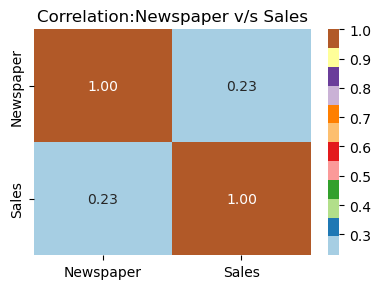

In [38]:
corr_newspaper_sales=df[["Newspaper","Sales"]].corr()
plt.figure(figsize=(4,3))
sns.heatmap(
    corr_newspaper_sales,
    annot=True,
    cmap="Paired",
    fmt=".2f"
)
plt.title("Correlation:Newspaper v/s Sales")
plt.tight_layout()

Correlation Insights (Marketing Channels vs Sales):

TV advertising spend shows the strongest positive correlation with Sales, indicating that increases in TV budget are closely associated with higher sales performance.

Radio advertising shows a moderate positive correlation with Sales, suggesting it contributes to sales but with less impact compared to TV.

Newspaper advertising shows weak correlation with Sales, indicating limited influence on sales performance in this dataset.

Overall, TV appears to be the most effective marketing channel for driving sales, followed by Radio, while Newspaper contributes minimally.

## Correlation of Each Channel with every other Channel

In [39]:
df["TV"].corr(df["Radio"])

np.float64(0.054808664465830034)

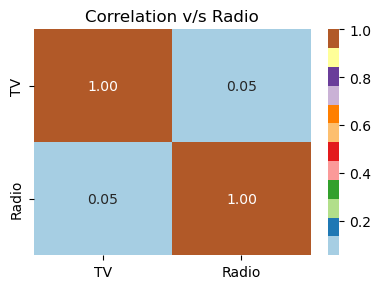

In [41]:
corr_tv_radio=df[["TV","Radio"]].corr()
plt.figure(figsize=(4,3))
sns.heatmap(
    corr_tv_radio,
    annot=True,
    cmap="Paired",
    fmt=".2f"
)
plt.title("Correlation v/s Radio")
plt.tight_layout()

In [42]:
df["TV"].corr(df["Newspaper"])

np.float64(0.056647874965056945)

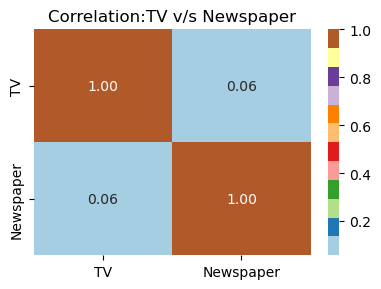

In [44]:
plt.figure(figsize=(4,3))
corr_tv_newspaper=df[["TV","Newspaper"]].corr()
sns.heatmap(
    corr_tv_newspaper,
    annot=True,
    cmap="Paired",
    fmt=".2f"
)
plt.title("Correlation:TV v/s Newspaper")
plt.tight_layout()

In [45]:
df["Radio"].corr(df["Newspaper"])

np.float64(0.3541037507611754)

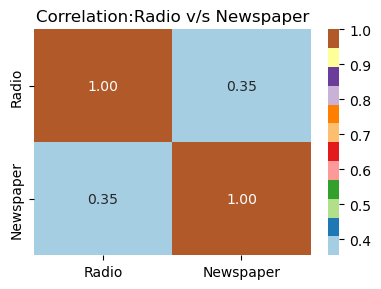

In [46]:
corr_radio_newspaper=df[["Radio","Newspaper"]].corr()
plt.figure(figsize=(4,3))
sns.heatmap(
    corr_radio_newspaper,
    cmap="Paired",
    fmt=".2f",
    annot=True
)
plt.title("Correlation:Radio v/s Newspaper")
plt.tight_layout()

Channel-to-Channel Correlation Analysis:

TV and Radio show moderate correlation (0.05), indicating some overlap in advertising patterns but not redundancy.

TV and Newspaper also show moderate correlation (0.05), suggesting partial similarity in spending trends.

Radio and Newspaper show relatively low correlation (0.35), indicating they behave more independently.

Overall, the correlations among channels are not high enough to cause multicollinearity issues, so all three channels can be safely used as features in the linear regression model.

## TRAINING MODEL

In [48]:
X=df[["TV","Radio","Newspaper"]]
y=df["Sales"]
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [49]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [50]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [54]:
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
y_pred=model.predict(X_test)

In [56]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [57]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [63]:
r2=r2_score(y_test,y_pred)
print("r squared:",r2)

r squared: 0.899438024100912


In [66]:
print(X_test.shape)

n=X_test.shape[0]
p=X_test.shape[1]
adjusted_r2=1-((1-r2)*(n-1))/(n-p-1)
print("Adjusted r2:",adjusted_r2)

(40, 3)
Adjusted r2: 0.8910578594426547


In [68]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error",mse)

Mean Squared Error 3.174097353976105


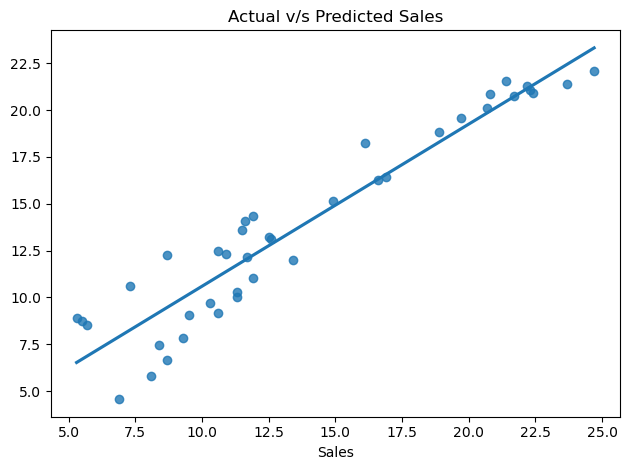

In [73]:
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter=True,
    ci=None
)
plt.title("Actual v/s Predicted Sales")
plt.tight_layout()

The Linear Regression model performs very well with an R² of 0.89, meaning 89% of the variation in Sales is explained by advertising spend across channels.

The Actual vs Predicted comparison shows that model predictions closely follow actual sales values, indicating good generalization on unseen data.